In [1]:
import matplotlib.pyplot as plt
import json

def plot_metric(name, metrics):
    train_steps, train_loss = [], []
    val_steps, val_loss = [], []
    for entry in metrics:
        step = entry.get("step")

        if "loss" in entry and "eval_loss" not in entry:
            train_steps.append(step)
            train_loss.append(entry["loss"])

        if "eval_loss" in entry:
            val_steps.append(step)
            val_loss.append(entry["eval_loss"])

    plt.figure(figsize=(10, 5))
    plt.plot(train_steps, train_loss, label="Train Loss", marker="o", linestyle="-")
    plt.plot(val_steps, val_loss, label="Validation Loss", marker="s", linestyle="--")
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Steps for {}".format(name))
    plt.legend()
    plt.grid(True)
    plt.show()
    

def plot_all_validation_metrics(metrics_dict):
    """
    Plots validation loss from multiple metrics in a single plot.

    Args:
        metrics_dict (dict): A dictionary where keys are metric names and values are metric lists.
    """
    plt.figure(figsize=(10, 5))

    for name, metrics in metrics_dict.items():
        val_steps, val_loss = [], []

        for entry in metrics:
            step = entry.get("step")
            if "eval_loss" in entry:
                val_steps.append(step)
                val_loss.append(entry["eval_loss"])

        plt.plot(val_steps, val_loss, label=f"{name} Validation Loss", marker="o", linestyle="--")

    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Validation Loss Across Different pruning strategies")
    plt.legend()
    plt.grid(True)
    plt.show()



In [2]:
with open("../saved_metrics/training_metrics.json", "r") as f:
    all_metrics = json.load(f)
    
with open("../saved_metrics/training_metrics_embedding.json", "r") as f:
    embedding_metrics = json.load(f)

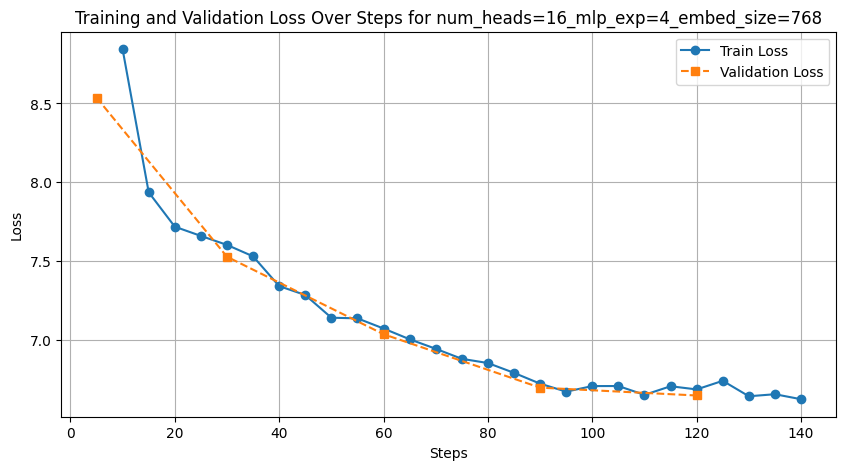

In [3]:
for k, v in embedding_metrics.items():
    plot_metric(k, v)

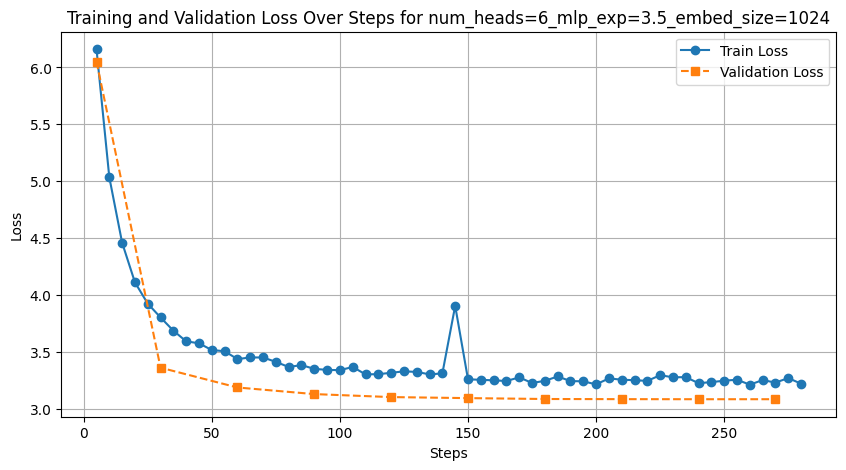

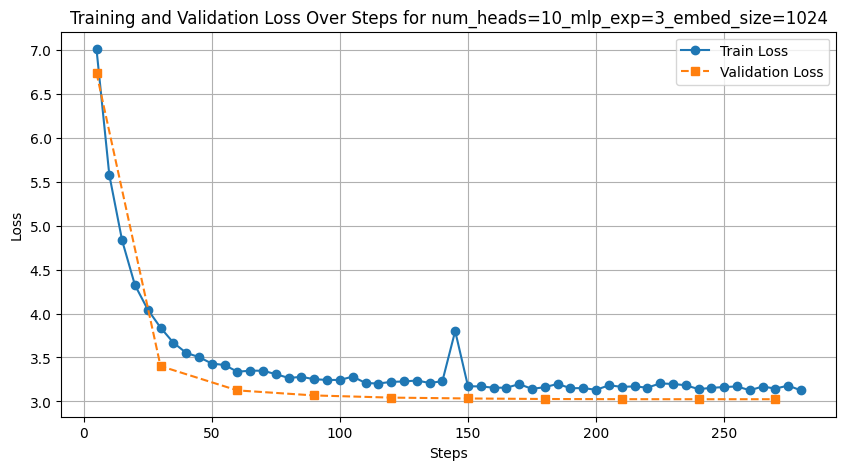

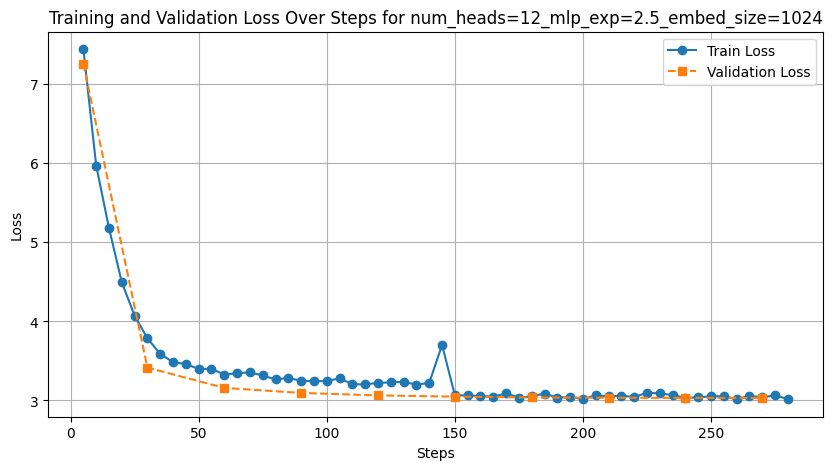

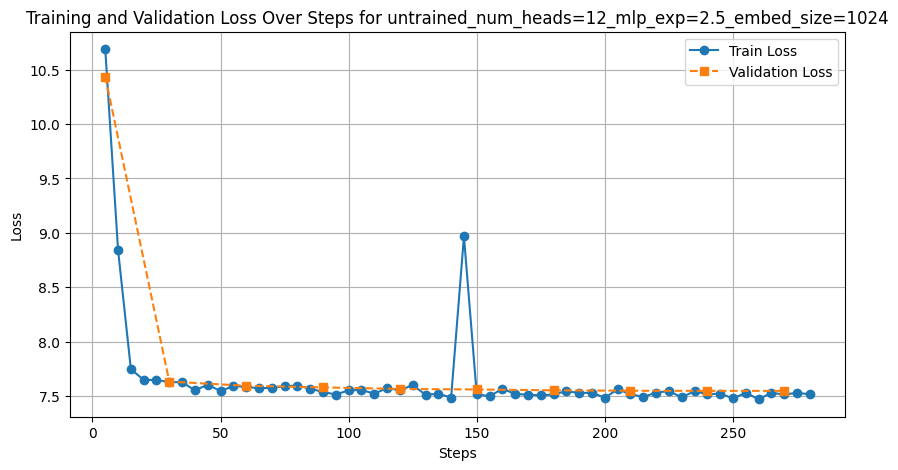

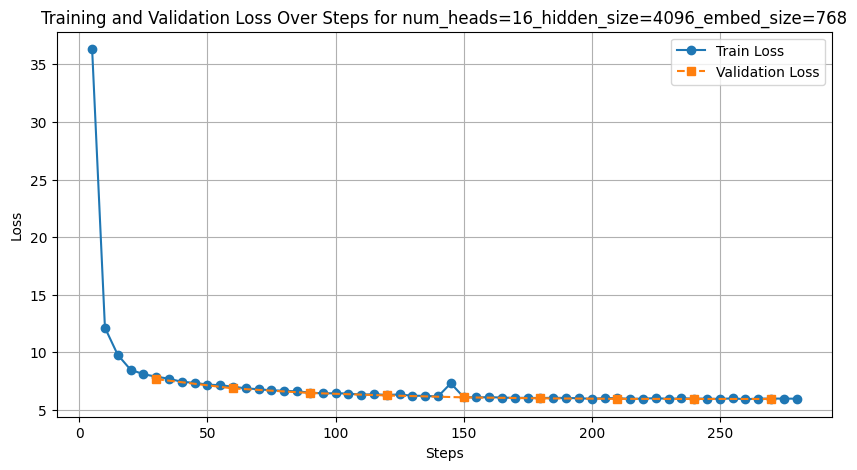

In [4]:
for k, v in all_metrics.items():
    plot_metric(k, v)

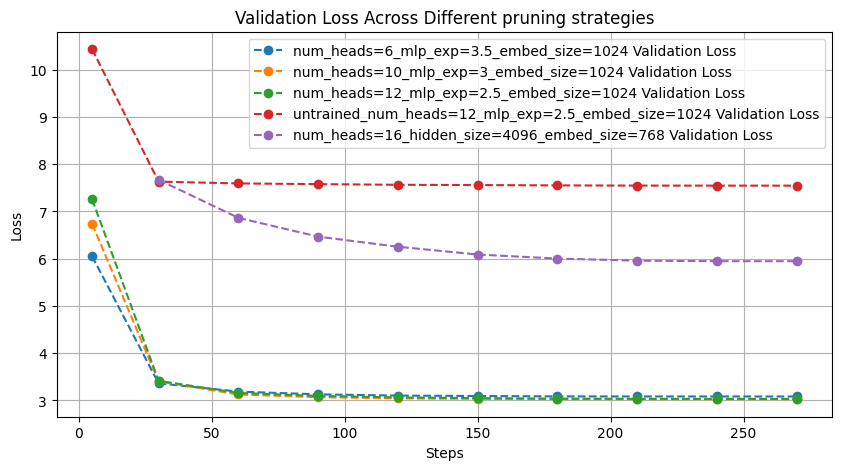

In [5]:
plot_all_validation_metrics(all_metrics)